In [136]:
import zipfile
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [139]:
z = zipfile.ZipFile("data/COCO17/downloads/val2017.zip")

In [140]:
z.filelist[-1]

<ZipInfo filename='val2017/000000500826.jpg' filemode='-rw-rw-r--' file_size=99471>

In [143]:
import json


z = zipfile.ZipFile("data/COCO17/downloads/annotations_trainval2017.zip")
j = json.loads(z.read("annotations/person_keypoints_val2017.json"))
ann = j["annotations"][105]

image_id = ann["image_id"]
bbox_list = ann["bbox"]

z = zipfile.ZipFile("data/COCO17/downloads/val2017.zip")
filename = "val2017/{:012d}.jpg".format(image_id) 
b = z.read(filename)
img = cv2.imdecode(np.frombuffer(b, dtype="byte"), cv2.IMREAD_COLOR)

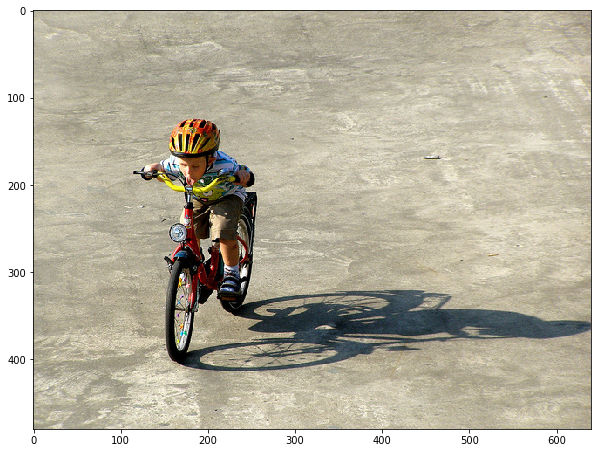

In [144]:
plt.figure(figsize=(10,10))
plt.imshow(img[:, :, ::-1])

In [108]:
def get_bbox_conners(bbox_list):
    x, y, w, h = bbox_list
    x += 0.5*w
    y += 0.5*h
    p0 = (x - 0.5*w, y - 0.5*h) # upperleft
    p1 = (x - 0.5*w, y + 0.5*h)
    p2 = (x + 0.5*w, y + 0.5*h) # lowerright
    p3 = (x + 0.5*w, y - 0.5*h)
    return [p0, p1, p2, p3]


def to_ints(t):
    return tuple([int(i) for i in t])

[126.93, 124.16, 128.28, 201.54]


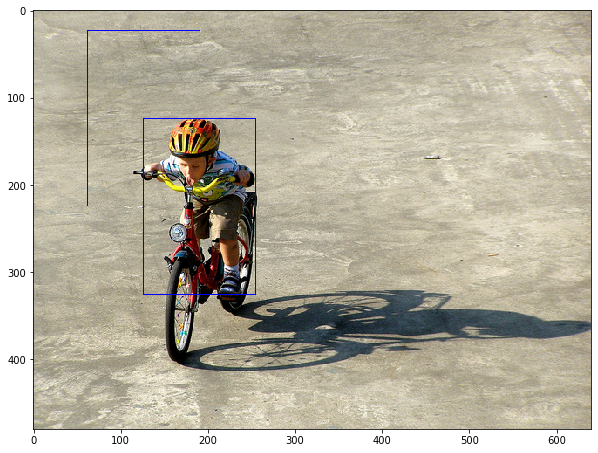

In [109]:
plt.figure(figsize=(10,10))

print(bbox_list)
points = get_bbox_conners(bbox_list)
for i in range(len(points)):
    img = cv2.line(img, to_ints(points[i-1]), to_ints(points[i]), color=(255,0,0))

plt.imshow(img[:, :, ::-1])

<module 'data.preprocess' from '/data/hanguangyun/workspaces/dl_overhaul/data/preprocess.py'>

In [16]:
from data.SVHN import SVHNDataset, test_32x32

In [17]:
d = SVHNDataset()

In [18]:
x = d.train_X[98]

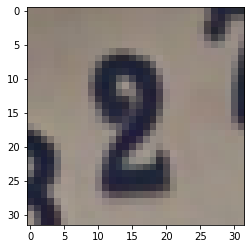

In [19]:
plt.imshow(x)

In [194]:
import importlib
from data import preprocess
importlib.reload(preprocess)

<module 'data.preprocess' from '/data/hanguangyun/workspaces/dl_overhaul/data/preprocess.py'>

In [200]:
import itertools

class Preprocessor:

    def __init__(self):
        self.crop = preprocess.with_prob(0.5, preprocess.random_crop)
        self.rotate = preprocess.with_prob(0.3, preprocess.random_rotation)
        self.perspective = preprocess.with_prob(0.3, preprocess.random_perspective)
        self.flip = preprocess.with_prob(0.5, preprocess.flip)

    def __call__(img):
        img = self.flip(img)
        img = self.rotate(img)
        img = self.perspective(img)
        img = self.crop(img, (28, 28))
        img = cv2.resize(img, (32, 32))

preprocess = Preprocessor()

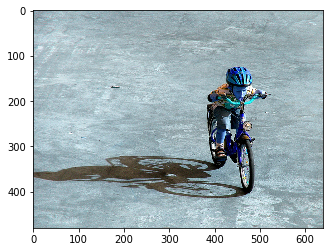

In [199]:
plt.imshow(preprocess.flip(img))

In [121]:
cv2.CV_32FC2

13

In [44]:
import data.CIFAR10

In [1]:
tarfile.Tarfile()

NameError: name 'tarfile' is not defined

In [19]:
y = np.zeros((4, 10))
y[np.arange(4), [0,1,2,3]] = 1

In [20]:
y

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])